# Deep Packet Models Evaluation

## Import Libraries

In [1]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from ml.utils import load_application_classification_cnn_model, load_traffic_classification_cnn_model, normalise_cm
from ml.metrics import confusion_matrix, get_classification_report
from utils import ID_TO_APP, ID_TO_TRAFFIC

## Configuration

In [2]:
# plot dpi
mpl.rcParams['figure.dpi'] = 300


# model path
application_classification_cnn_model_path = 'model/application_classification.cnn.model'
traffic_classification_cnn_model_path = 'model/traffic_classification.cnn.model'

# test data path
application_classification_test_data_path = 'train_test_data/application_classification/test.parquet'
traffic_classification_test_data_path = 'train_test_data/traffic_classification/test.parquet'

## Load Model

In [3]:
application_classification_cnn = load_application_classification_cnn_model(application_classification_cnn_model_path)
traffic_classification_cnn = load_traffic_classification_cnn_model(traffic_classification_cnn_model_path)

## Performance

In [4]:
def plot_confusion_matrix(cm, labels):
    normalised_cm = normalise_cm(cm)
    fig, ax = plt.subplots(figsize=(12, 12))
    sns.heatmap(
        data=normalised_cm, cmap='YlGnBu', 
        xticklabels=labels, yticklabels=labels,
        annot=True, ax=ax, fmt='.2f'
    )
    ax.set_xlabel('Predict labels')
    ax.set_ylabel('True labels')
    fig.show()

### Application Classification

#### CNN

In [5]:
app_cnn_cm = confusion_matrix(
    data_path=application_classification_test_data_path,
    model=application_classification_cnn,
    num_class=len(ID_TO_APP)
)

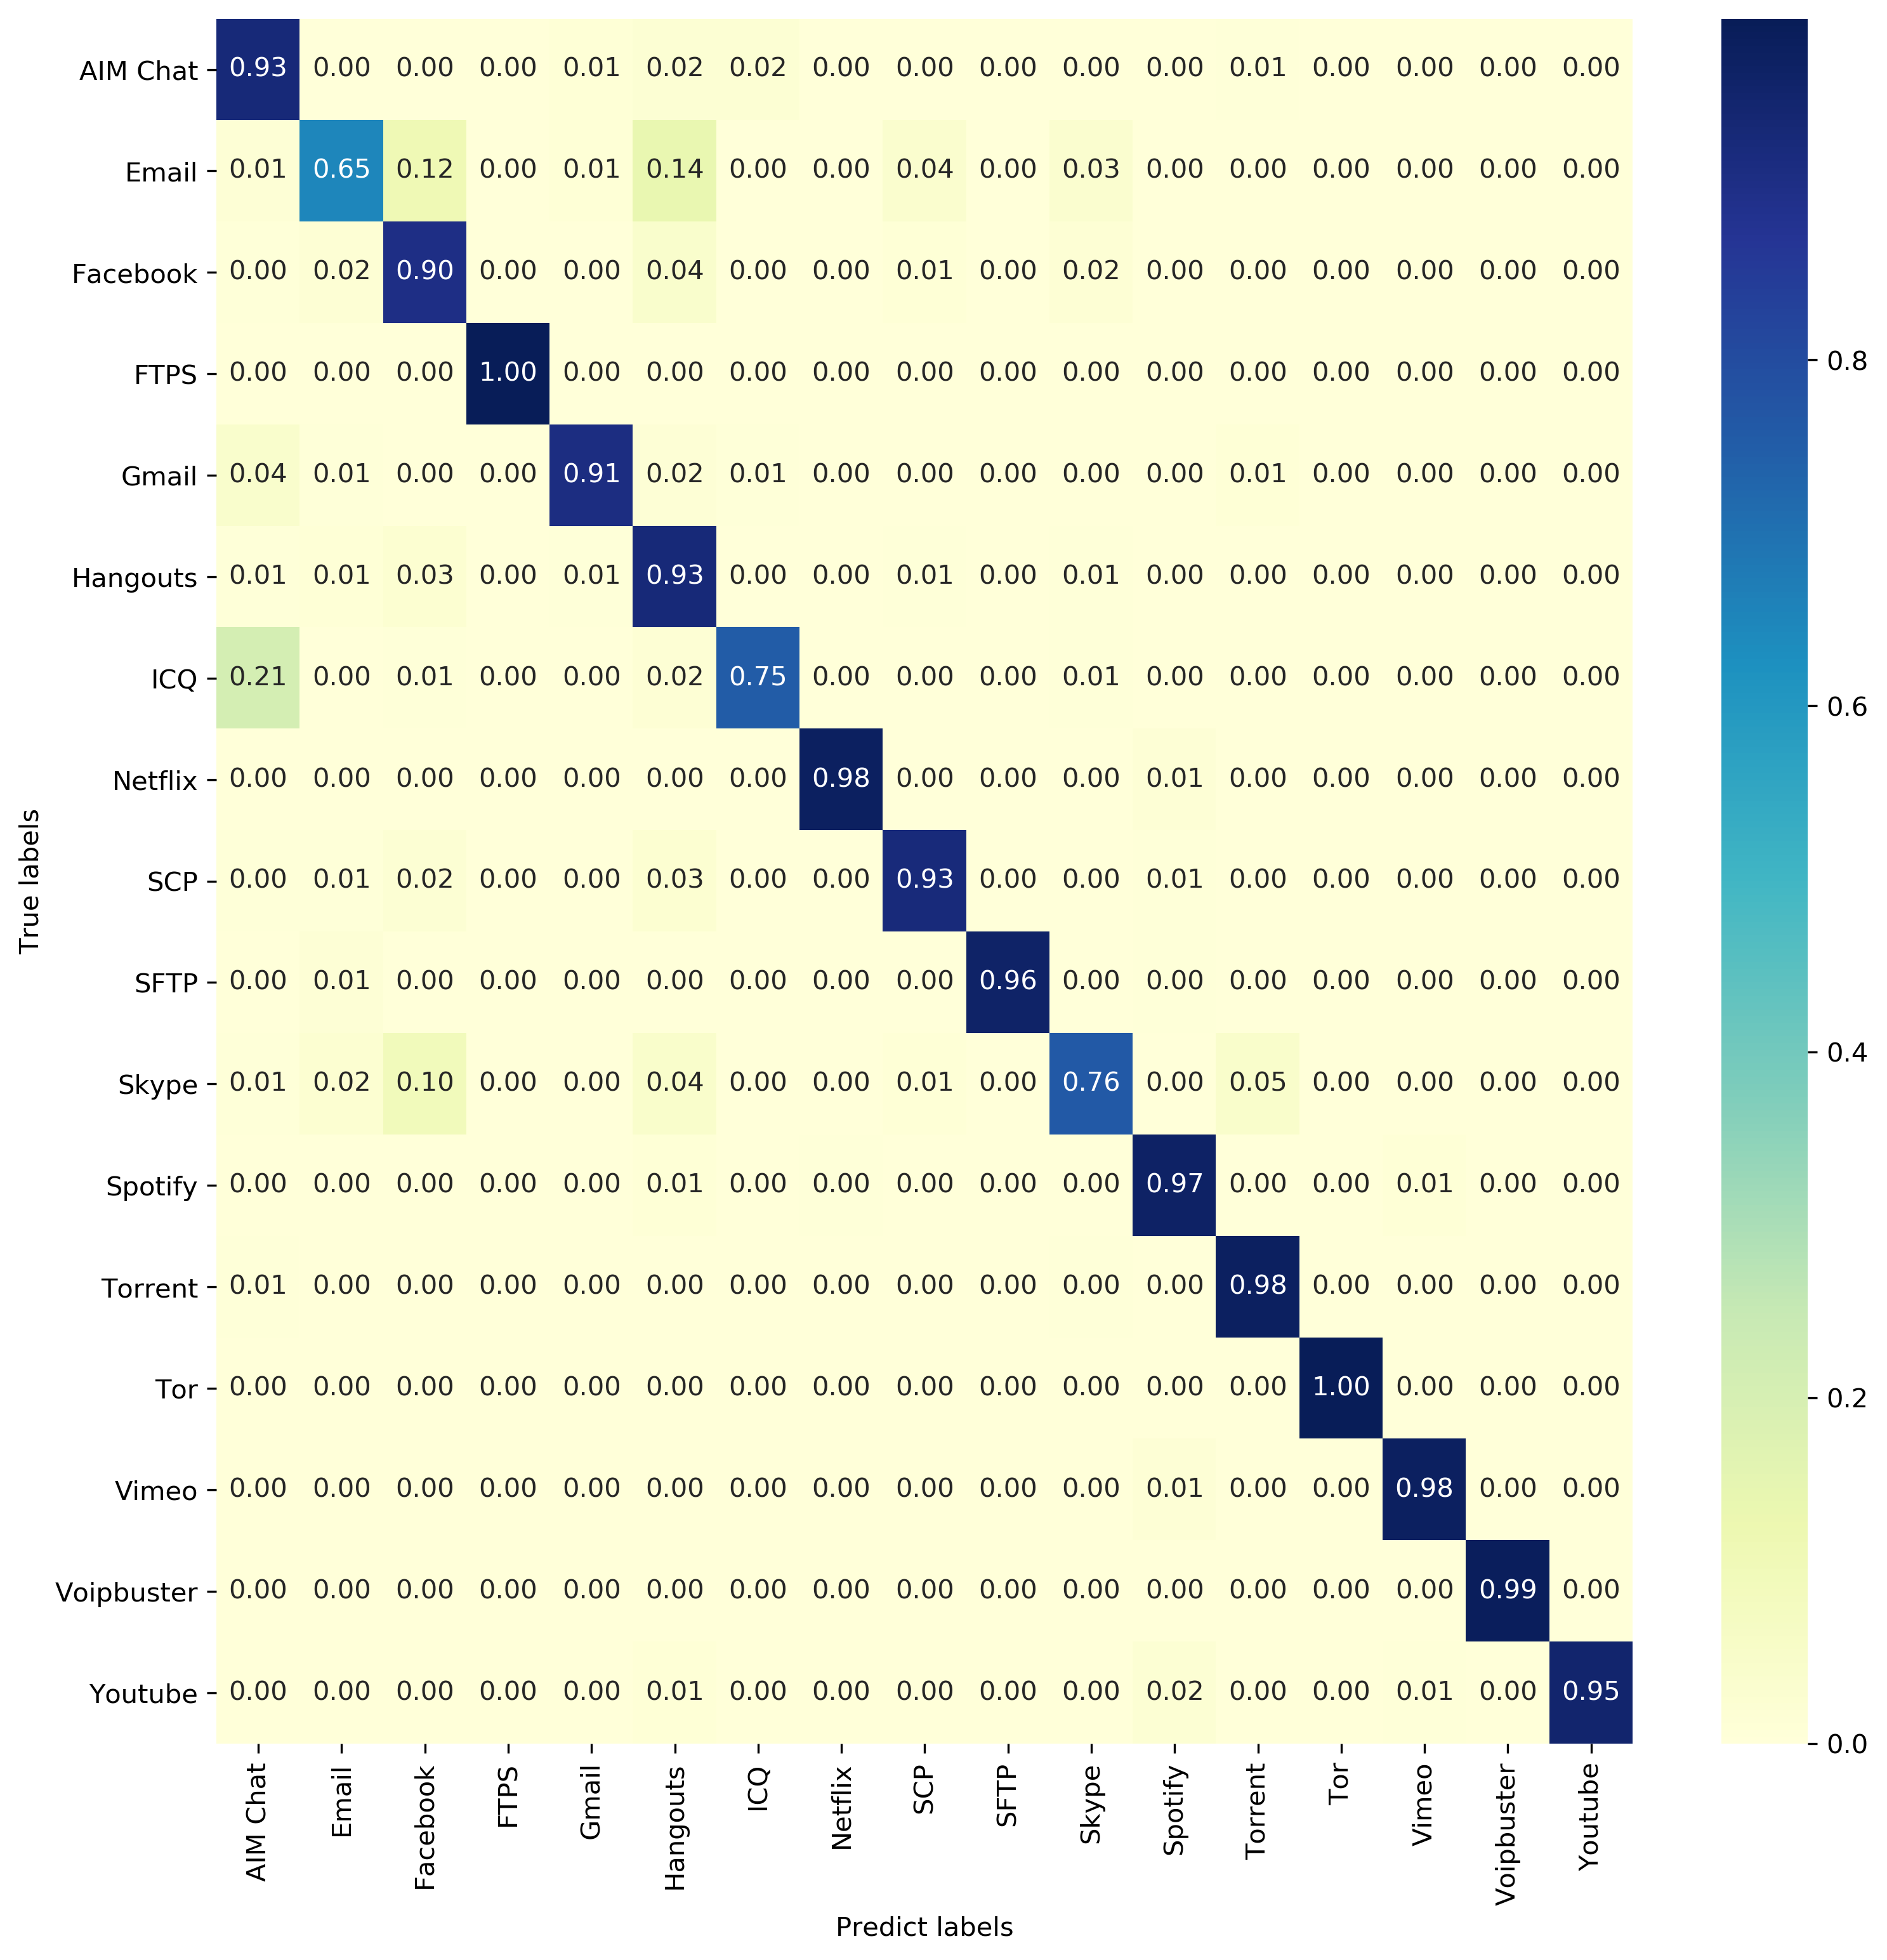

In [6]:
app_labels = []
for i in sorted(list(ID_TO_APP.keys())):
    app_labels.append(ID_TO_APP[i])
plot_confusion_matrix(app_cnn_cm, app_labels)

In [7]:
get_classification_report(app_cnn_cm, app_labels)

,label,precision,recall
0,AIM Chat,0.048050,0.930946
1,Email,0.185192,0.647936
2,Facebook,0.833078,0.901853
3,FTPS,0.998785,0.995186
4,Gmail,0.162633,0.910223
5,Hangouts,0.923520,0.929447
6,ICQ,0.093160,0.752518
7,Netflix,0.950540,0.981588
8,SCP,0.789973,0.925415
9,SFTP,0.998043,0.964007


### Traffic Classification

#### CNN

In [8]:
traffic_cnn_cm = confusion_matrix(
    data_path=traffic_classification_test_data_path,
    model=traffic_classification_cnn,
    num_class=len(ID_TO_TRAFFIC)
)


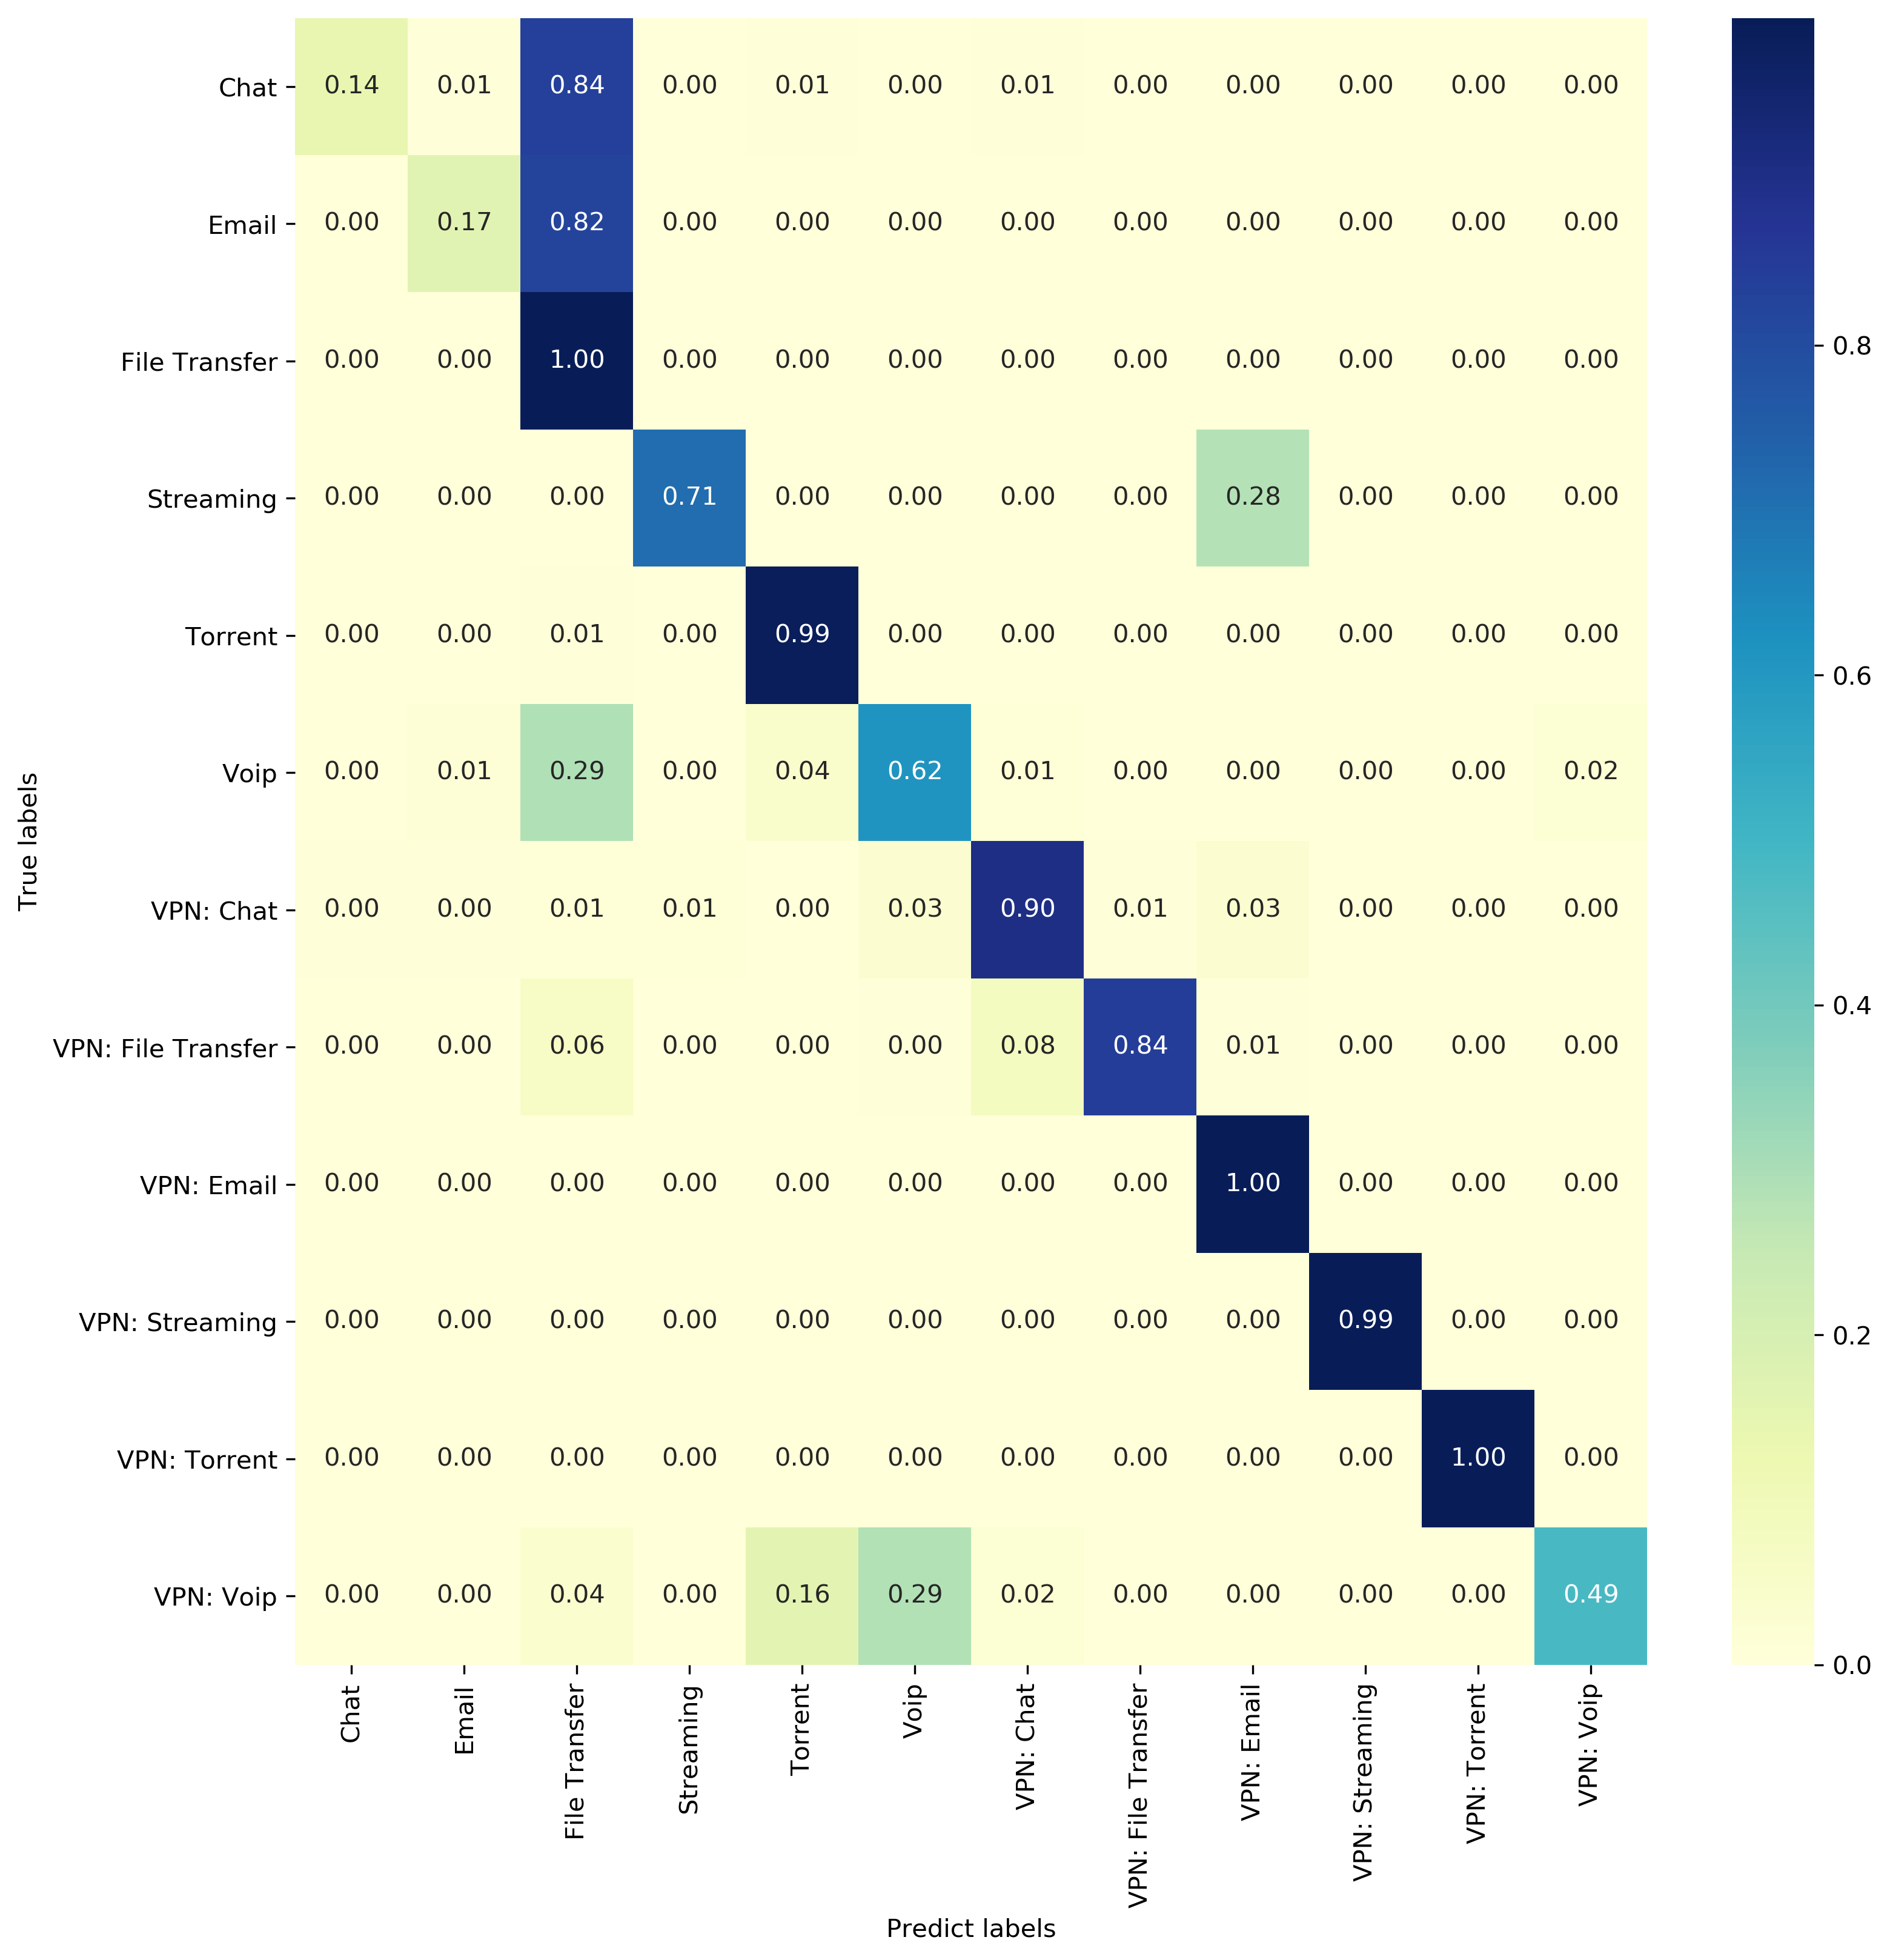

In [9]:
traffic_labels = []
for i in sorted(list(ID_TO_TRAFFIC.keys())):
    traffic_labels.append(ID_TO_TRAFFIC[i])

plot_confusion_matrix(traffic_cnn_cm, traffic_labels)

In [10]:
get_classification_report(traffic_cnn_cm, traffic_labels)

,label,precision,recall
0,Chat,0.558824,0.140479
1,Email,0.132695,0.167066
2,File Transfer,0.790650,0.998449
3,Streaming,0.966900,0.710631
4,Torrent,0.128468,0.993157
5,Voip,0.861641,0.616195
6,VPN: Chat,0.333166,0.902410
7,VPN: File Transfer,0.995494,0.844921
8,VPN: Email,0.171821,0.995940
9,VPN: Streaming,0.998482,0.994873
